#  Project :- CAB CANCELLATION


This project aims to develop a machine learning model that can predict whether
a cab booking will be canceled. This prediction can help the cab service company reduce operational disruptions and allocate resources more efficiently.

# Problems :
Booking cancellations occur close to the trip start time,causing inconvenience to passengers.


In [220]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [221]:
df=pd.read_csv('/content/YourCabs.csv')
df.head()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [222]:
df.shape

(43431, 18)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   travel_type_id       43431 non-null  int64  
 4   package_id           7550 non-null   float64
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [224]:
df.describe()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,43431.000000,7550.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.137252,2.030066,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,0.437712,1.461756,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,2.000000,1.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,3.000000,7.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


In [225]:
# Checks for each missing values in dataset
df.isnull().sum()/len(df)*100

,0
id,0.000000
user_id,0.000000
vehicle_model_id,0.000000
travel_type_id,0.000000
package_id,82.616104
from_area_id,0.202620
to_area_id,21.040271
from_city_id,62.365591
to_city_id,96.343626
from_date,0.000000


# Data Cleaning:


In [226]:
df = df.drop(['id','user_id','package_id','to_area_id','from_city_id','to_city_id'],axis=1)

In [227]:
df.shape

(43431, 12)

In [228]:
# Convert to datetime
df['from_date'] = pd.to_datetime(df['from_date'], errors='coerce')
df['booking_created'] = pd.to_datetime(df['booking_created'], errors='coerce')

# Creating a new feature: time gap between booking and trip (in hours)
df['booking_lead_time'] = (df['from_date'] - df['booking_created']).dt.total_seconds() / 3600


In [229]:
# booking_lead_time is created, the original date columns are no longer needed
df = df.drop(['from_date', 'booking_created'], axis=1)

In [230]:

# Handle Missing Values in the Dataset


# 1. Fill 'from_area_id' with the most frequent area (mode)
df['from_area_id'] = df['from_area_id'].fillna(df['from_area_id'].mode()[0])

# 2. Fill missing 'to_lat' and 'to_long' using median of each 'from_area_id' group
df['to_lat'] = df['to_lat'].fillna(df.groupby('from_area_id')['to_lat'].transform('median'))
df['to_long'] = df['to_long'].fillna(df.groupby('from_area_id')['to_long'].transform('median'))

# 3. Fill any remaining NaNs with overall column median
df['to_lat'] = df['to_lat'].fillna(df['to_lat'].median())
df['to_long'] = df['to_long'].fillna(df['to_long'].median())

# 4. Fill missing values in 'booking_lead_time' with the column median
df['booking_lead_time'] = df['booking_lead_time'].fillna(df['booking_lead_time'].median())

# 4. Final checking
print("-> Total remaining missing values:", df.isnull().sum().sum())


-> Total remaining missing values: 186


In [231]:
df.isnull().sum()/len(df)*100

,0
vehicle_model_id,0.000000
travel_type_id,0.000000
from_area_id,0.000000
online_booking,0.000000
mobile_site_booking,0.000000
from_lat,0.214133
from_long,0.214133
to_lat,0.000000
to_long,0.000000
Car_Cancellation,0.000000


In [232]:
# Fill missing values in 'from_lat' and 'from_long' with the column median
df['from_lat'] = df['from_lat'].fillna(df['from_lat'].median())
df['from_long'] = df['from_long'].fillna(df['from_long'].median())

# Final check for missing values
print("-> Total remaining missing values after handling 'from_lat' and 'from_long':", df.isnull().sum().sum())

-> Total remaining missing values after handling 'from_lat' and 'from_long': 0


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     43431 non-null  int64  
 1   travel_type_id       43431 non-null  int64  
 2   from_area_id         43431 non-null  float64
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   from_lat             43431 non-null  float64
 6   from_long            43431 non-null  float64
 7   to_lat               43431 non-null  float64
 8   to_long              43431 non-null  float64
 9   Car_Cancellation     43431 non-null  int64  
 10  booking_lead_time    43431 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 3.6 MB


# Encoding :
* **We will use one hot encoding because categorical variable is nominal (no intrinsic order)**

In [234]:
# Show categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns to encode:", cat_cols.tolist())


Categorical columns to encode: []


In [235]:
# numerically stored categorical columns
for col in df.columns:
    if df[col].nunique() < 15 and df[col].dtype in ['int64', 'float64']:
        print(f"{col}: {df[col].unique()}")


travel_type_id: [2 1 3]
online_booking: [0 1]
mobile_site_booking: [0 1]
Car_Cancellation: [0 1]


We will change the data type for numerically stored categorical columns and then perform encoding
* we will not perform encoding on Car_Cancellation because it is our target variable

In [236]:
df['travel_type_id'] = df['travel_type_id'].astype('category')
df['online_booking'] = df['online_booking'].astype('category')
df['mobile_site_booking'] = df['mobile_site_booking'].astype('category')

In [237]:
df_encoded = pd.get_dummies(df, columns=['travel_type_id', 'online_booking', 'mobile_site_booking'], drop_first=True)


# Outlier Detection (using boxplot):

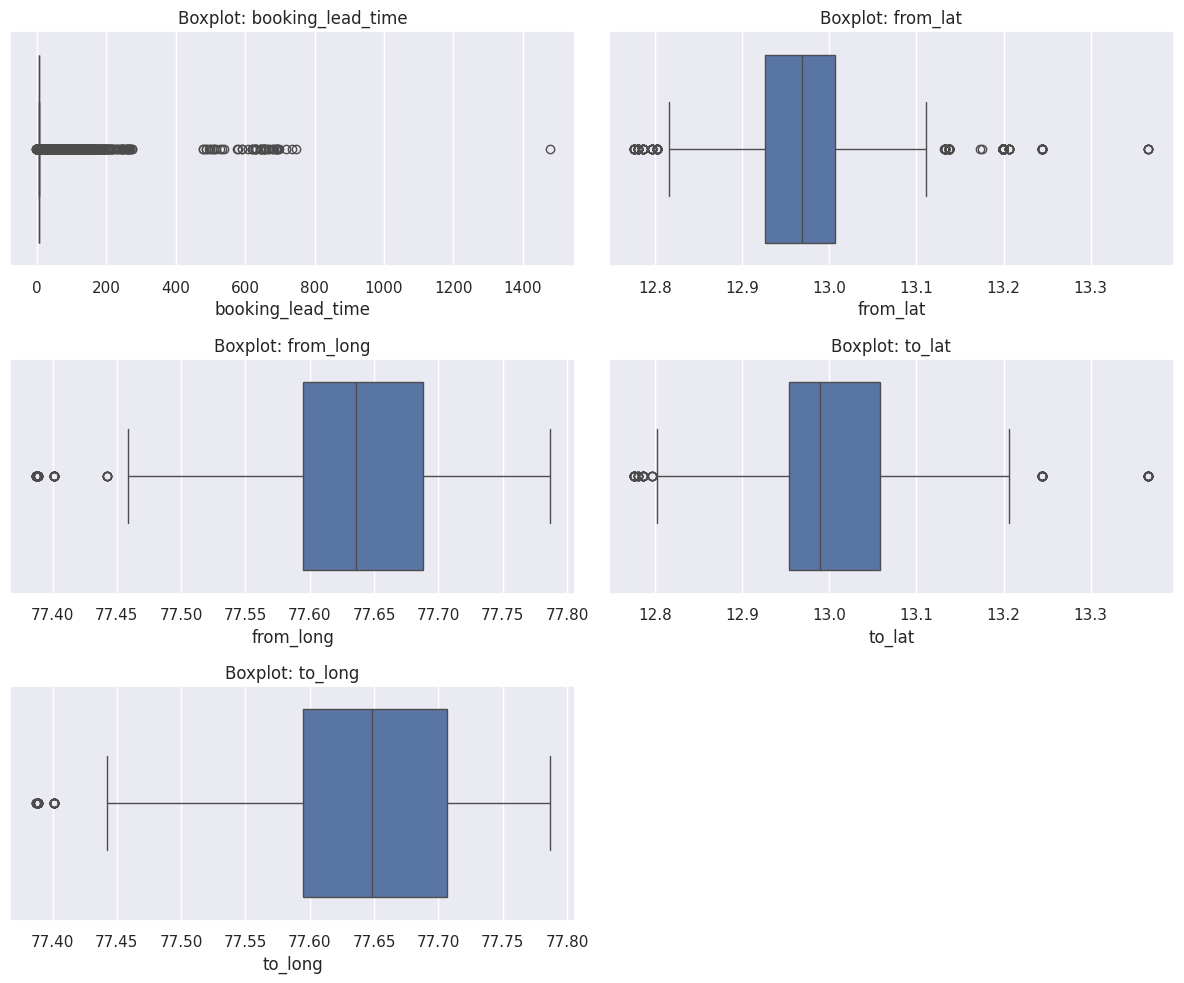

In [238]:

plt.figure(figsize=(12, 10))
# Plot boxplots one by one

# booking_lead_time
plt.subplot(3, 2, 1)
sns.boxplot(x=df_encoded['booking_lead_time'])
plt.title("Boxplot: booking_lead_time")

# from_lat
plt.subplot(3, 2, 2)
sns.boxplot(x=df_encoded['from_lat'])
plt.title("Boxplot: from_lat")

# from_long
plt.subplot(3, 2, 3)
sns.boxplot(x=df_encoded['from_long'])
plt.title("Boxplot: from_long")

# to_lat
plt.subplot(3, 2, 4)
sns.boxplot(x=df_encoded['to_lat'])
plt.title("Boxplot: to_lat")

# to_long
plt.subplot(3, 2, 5)
sns.boxplot(x=df_encoded['to_long'])
plt.title("Boxplot: to_long")

plt.tight_layout()
plt.show()


In [239]:
# remove outliers using IQR:

# Define the columns to clean
columns_to_clean = ['booking_lead_time', 'from_lat', 'from_long', 'to_lat', 'to_long']

# Apply IQR method to each column
for col in columns_to_clean:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_encoded = df_encoded[(df_encoded[col] >= lower_bound) & (df_encoded[col] <= upper_bound)]


# Scaling :

In [240]:
X = df_encoded.drop('Car_Cancellation', axis=1)  # Features
y = df_encoded['Car_Cancellation']               # Target

In [241]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [242]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [243]:
# To Balance data using SMOTE Technique
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
# Apply to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE:")
print("Class 0:", sum(y_train_smote == 0))
print("Class 1:", sum(y_train_smote == 1))


After SMOTE:
Class 0: 18455
Class 1: 18455


# Model Building:

# Logistic Regression

In [244]:
# Train logistic regression on SMOTE-balanced data
model = LogisticRegression(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predict on the scaled test data
y_pred = model.predict(X_test_scaled)


In [245]:
# Probability scores (for ROC-AUC)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))


Accuracy : 0.7155466399197593
Precision: 0.15627051871306633
Recall   : 0.6415094339622641
F1 Score : 0.25131995776135163
ROC AUC  : 0.7495636157154424


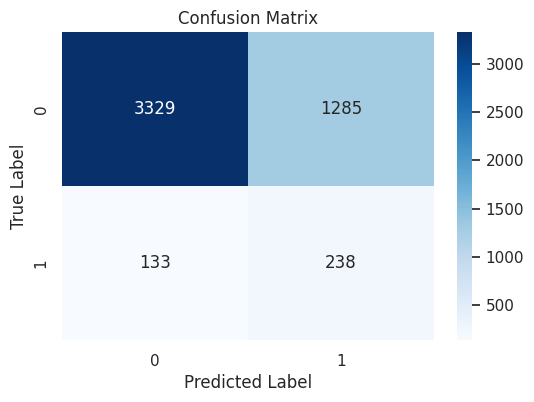

In [246]:
# Confusion Matrix :
cm = confusion_matrix(y_test, y_pred)

# Heatmap :
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [247]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.72      0.82      4614
           1       0.16      0.64      0.25       371

    accuracy                           0.72      4985
   macro avg       0.56      0.68      0.54      4985
weighted avg       0.90      0.72      0.78      4985



In [248]:
# Predictions on training and test sets
y_train_pred_lr = model.predict(X_train_scaled)
y_test_pred_lr = model.predict(X_test_scaled)

# Accuracy scores
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)

# Print results
print("Logistic Regression Accuracy Scores:")
print("Train Accuracy:", round(train_acc_lr, 4))
print("Test Accuracy :", round(test_acc_lr, 4))


Logistic Regression Accuracy Scores:
Train Accuracy: 0.7174
Test Accuracy : 0.7155


# Decesion Tree

In [249]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred_dt = dt_model.predict(X_test_scaled)

# Get probabilities (for ROC AUC)
y_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]


Decision Tree Evaluation:
Accuracy : 0.8461384152457372
Precision: 0.19349845201238391
Recall   : 0.33692722371967654
F1 Score : 0.24582104228121926
ROC AUC  : 0.631710065580321


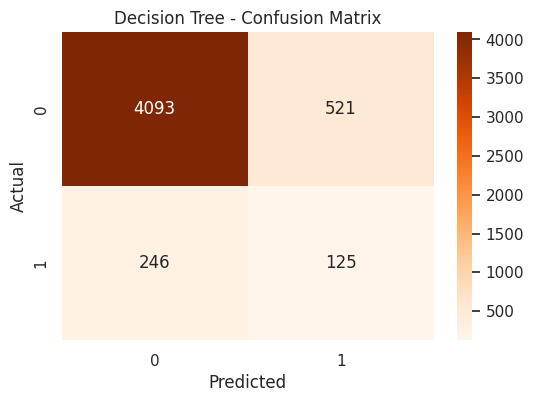


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      4614
           1       0.19      0.34      0.25       371

    accuracy                           0.85      4985
   macro avg       0.57      0.61      0.58      4985
weighted avg       0.89      0.85      0.86      4985



In [250]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Print evaluation metrics
print("Decision Tree Evaluation:")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1 Score :", f1_score(y_test, y_pred_dt))
print("ROC AUC  :", roc_auc_score(y_test, y_proba_dt))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))


In [251]:
# Predictions on training and test sets
y_train_pred_dt = dt_model.predict(X_train_smote)
y_test_pred_dt = dt_model.predict(X_test_scaled)

# Accuracy scores
train_accuracy = accuracy_score(y_train_smote, y_train_pred_dt)
test_accuracy = accuracy_score(y_test, y_test_pred_dt)

# Print results
print("Decision Tree Accuracy Scores:")
print("Train Accuracy:", round(train_accuracy, 4))
print("Test Accuracy :", round(test_accuracy, 4))


Decision Tree Accuracy Scores:
Train Accuracy: 0.9671
Test Accuracy : 0.8461


# Overfitting Exist (Prune the Tree)





In [252]:
# Pruned Decision Tree
pruned_dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Train on SMOTE-balanced data
pruned_dt_model.fit(X_train_smote, y_train_smote)

# Predict on train and test sets
y_train_pred_pruned = pruned_dt_model.predict(X_train_smote)
y_test_pred_pruned = pruned_dt_model.predict(X_test_scaled)

# Accuracy
print("Pruned Decision Tree Accuracy Scores:")
print("Train Accuracy:", round(accuracy_score(y_train_smote, y_train_pred_pruned), 4))
print("Test Accuracy :", round(accuracy_score(y_test, y_test_pred_pruned), 4))

Pruned Decision Tree Accuracy Scores:
Train Accuracy: 0.7423
Test Accuracy : 0.6798


In [253]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(dt_model, 'decision_tree_model.pkl')
print("Models saved successfully!")

Models saved successfully!
